# 6.2 Exploring Relationships

## Table of Contents

## 1. Import Libraries and Data
## 2. Correlation Matrix
## 3. Scatter Plot
## 4. Pair Plot
## 5. Categorical Plot
## 6. Questions and Answers
## 7. Hypothesis

# 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
# Creating a path for the data
path = r'C:\Users\Spero\Documents\Boat Sales Analysis'

In [7]:
# Importing Data
df_boat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col=[0])

In [8]:
#checking the dataframe
df_boat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6001 entries, 1 to 9887
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        6001 non-null   int64  
 1   Boat Type                    6001 non-null   object 
 2   Manufacturer                 6001 non-null   object 
 3   Type                         6001 non-null   object 
 4   Year Built                   6001 non-null   int64  
 5   Length                       6001 non-null   float64
 6   Width                        6001 non-null   float64
 7   Material                     6001 non-null   object 
 8   Number of views last 7 days  6001 non-null   int64  
 9   Currency                     6001 non-null   object 
 10  EURO Price                   6001 non-null   float64
 11  Country                      6001 non-null   object 
 12  City                         6001 non-null   object 
dtypes: float64(3), int

In [10]:
df_boat.shape

(6001, 13)

In [11]:
df_boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Currency,EURO Price,Country,City
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490.0,Germany,BÃ¶nningstedt
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399.0,Germany,Bayern
10,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,CHF,3535.0,Switzerland,Seengen
12,3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,EUR,3500.0,Italy,Lake Garda
13,4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,CHF,4646.0,Switzerland,Zugersee


# 2. Correlation Matrix

In [12]:
df_boat.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Number of views last 7 days', 'Currency',
       'EURO Price', 'Country', 'City'],
      dtype='object')

In [14]:
# creating a subset to exclude all the cayegorical variables
sub = df_boat[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'EURO Price']]

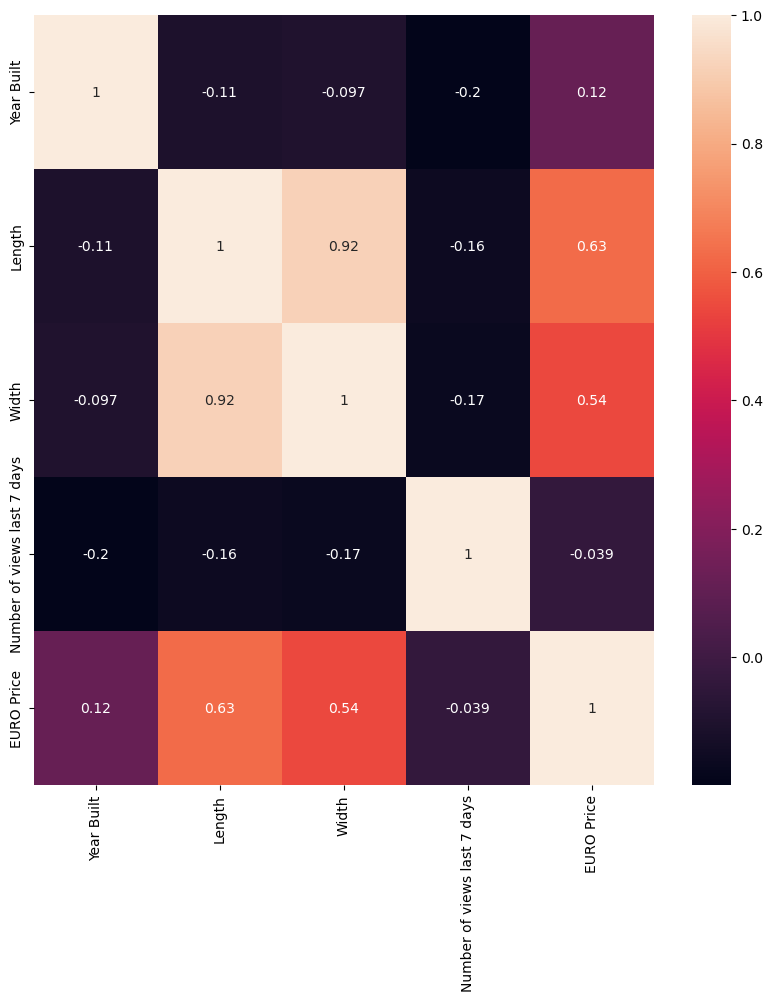

In [15]:
# creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#creating correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

## Looking at the heat map length and width have a strong possitive correlation of 0.92 this makes sense because with the dementions of a boat if one increases then the other has to increase to keep the boat sea worthy. 
## With the price and the size of the boat we see for length a correlation of 0.63 which positive but not very strong. For width we have a correlation of 0.54 which is also positive but still not very strong as well.
## The correltion between the number of views and the price is that the correlation between these two variables is -0.039 so not only is it a negative correlation is also very weak.

# 3. Scatter Plot

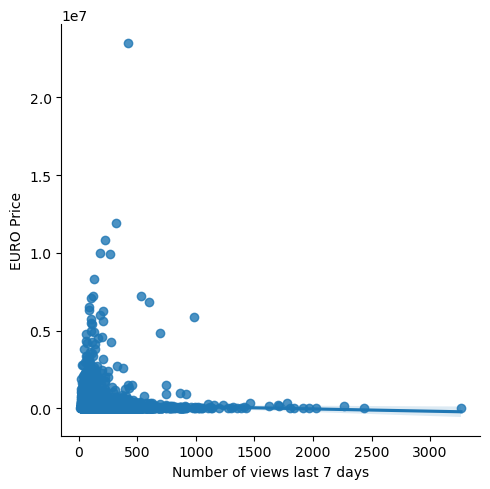

In [27]:
# Scatterplot for the variables "Number of views last 7 days" and "EURO Price" to better see their correlation
sns.lmplot(x='Number of views last 7 days', y='EURO Price', data = df_boat)

## There appears to be a slight downward trend, but for boats priced under 500,000 Euros there is a high concentration, The highest number of views appears to be for a boat under 200,000 Euros.  From this we can see that most customers are looking for boats under 500,000 Euros. There is a boat listed for over 20,000,000 Euros and only has 500 views in the last 7 days this may only have a few views compared to the rest of the listings due to such a high price and/or many people not able to afford a boat of that high of a price and won't look at the listing because of that.

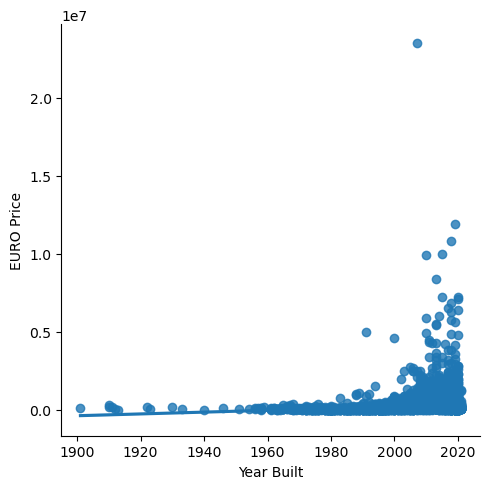

In [29]:
# scatterplot for the "Year Built" and "EURO Price" variables
sns.lmplot(x='Year Built', y='EURO Price', data = df_boat)

## There is a slight upward trend between these two variables. This makes sense because most older models will depreciate in value over time. Another factor to the pricing could be the type of boat and is condition as well.

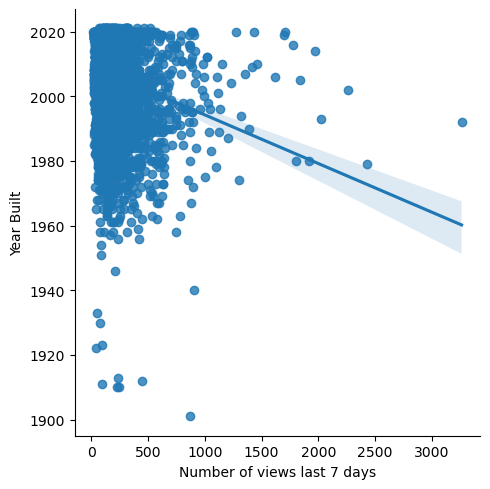

In [30]:
#creating scatterplot for correlation between "Number of views last 7 days" and "Year Built"
sns.lmplot(x='Number of views last 7 days', y='Year Built', data=df_boat)

## Here we see a downward trend which means that more views are for older boats. Customers are viewing older boats more most likely due to their prices being lower than new boats as we saw in the previous scatter plot.

# 4. Pair Plots

In [31]:
sub.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'EURO Price'],
      dtype='object')

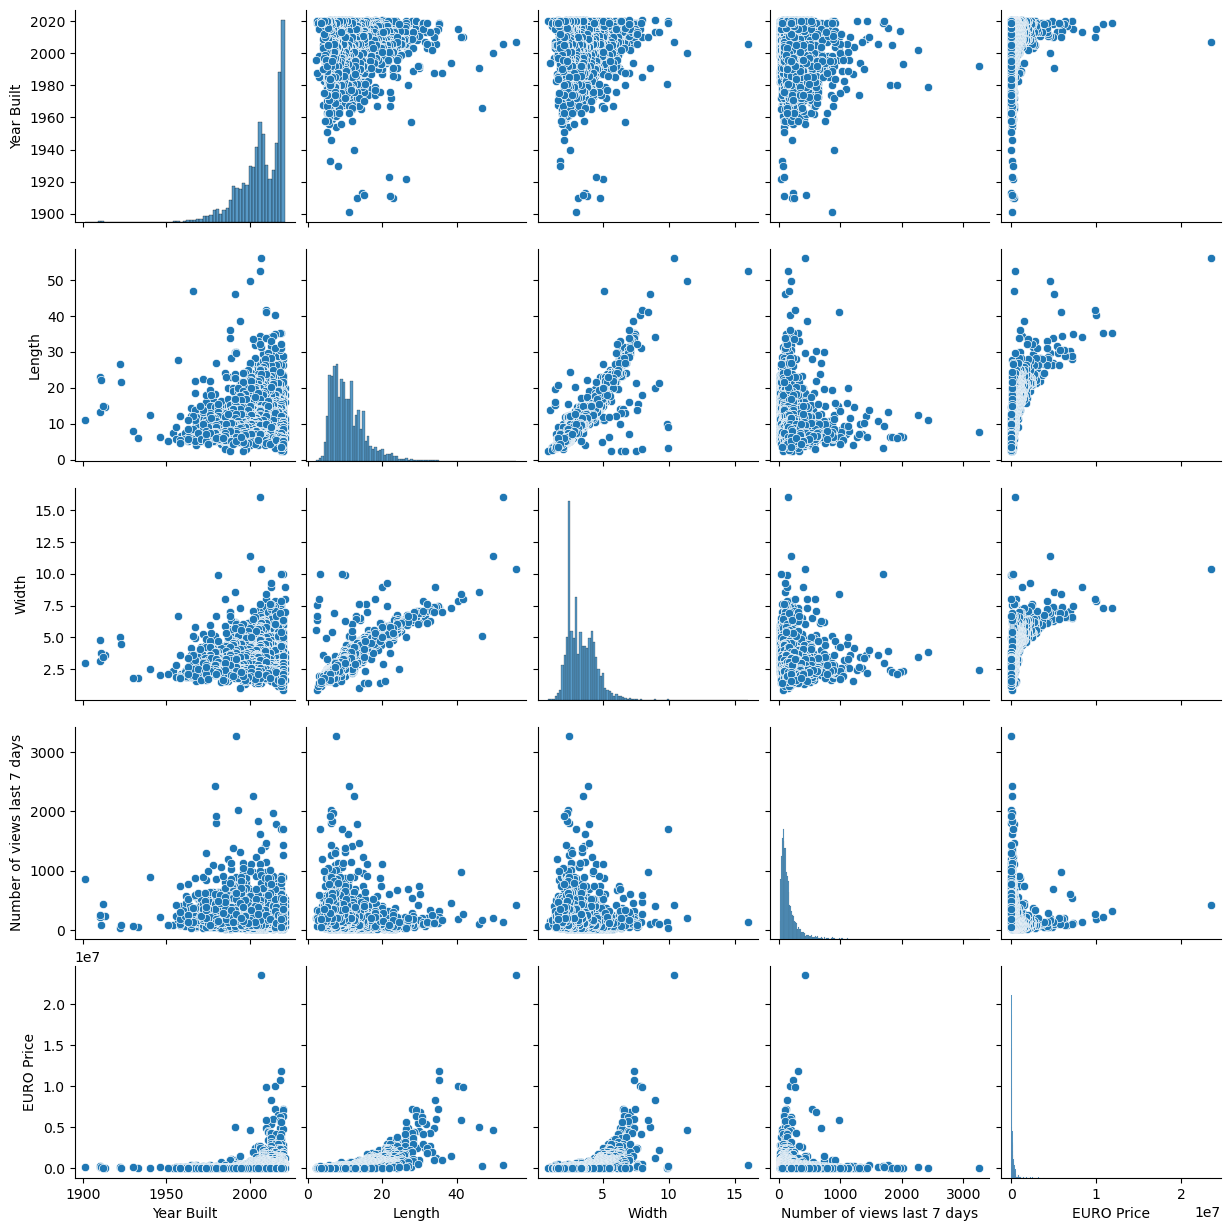

In [32]:
p = sns.pairplot(sub)

## Since their are many factors that can affect price we do not gain much insight from the pair plot than what was already stated for the previous scatter plots. There is a positive correlation that we can see for length and price of the boat as well as width and price of the boat. This makes sense because generally larger boats will cost more money due the the amount of material used to make it.

# 5. Categorical plots

<AxesSubplot:xlabel='EURO Price', ylabel='Count'>

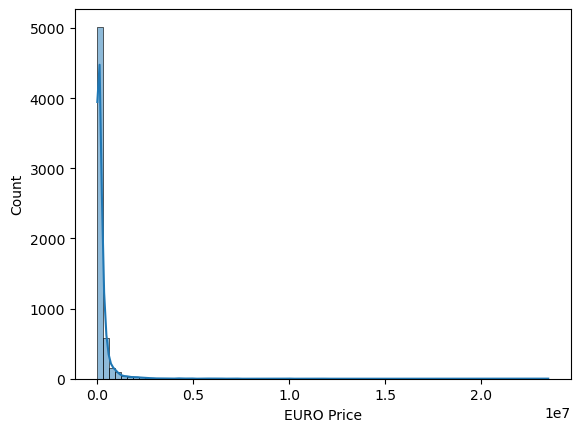

In [33]:
# Creating a histogram of the price of the boats to visualize their distributuion
sns.histplot(df_boat['EURO Price'], bins=75,kde=True)

In [35]:
# creating categories for lsiting prices
df_boat.loc[df_boat['EURO Price'] <50000, 'Price Category'] = 'Low Price'
df_boat.loc[df_boat['EURO Price'] >100000, 'Price Category'] = 'High Price'
df_boat.loc[(df_boat['EURO Price'] >=50000) & (df_boat['EURO Price'] <=100000), 'Price Category'] = 'Mid Price'

In [36]:
df_boat['Price Category'].value_counts(dropna=False)

High Price    2682
Low Price     1842
Mid Price     1477
Name: Price Category, dtype: int64

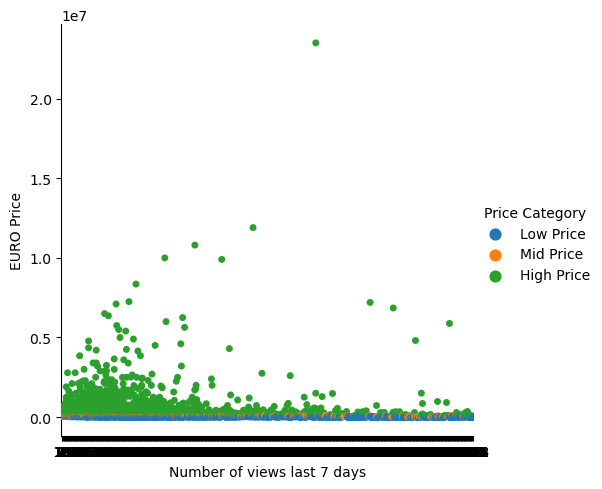

In [38]:
#creating categorical plot for number of views with euro price
C = sns.catplot(x='Number of views last 7 days', y='EURO Price', hue = 'Price Category', data=df_boat)

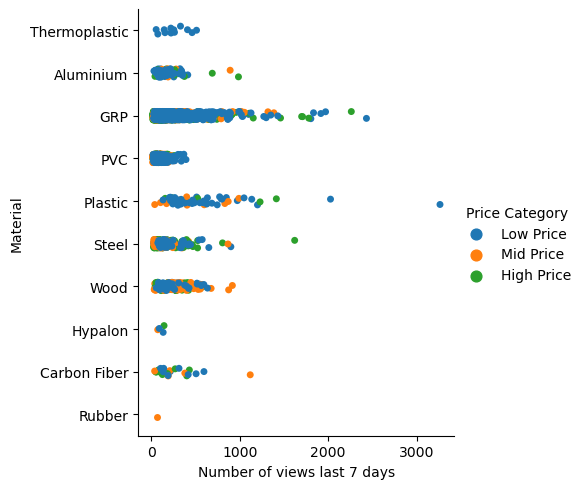

In [45]:
#creating categorical plot for the number of view with the boats material
M = sns.catplot(x='Number of views last 7 days', y='Material', hue = 'Price Category', data=df_boat)

In [49]:
df_boat['Material'].value_counts(dropna=False)

GRP              4223
PVC              1001
Steel             399
Wood              145
Aluminium         121
Plastic            68
Carbon Fiber       26
Thermoplastic      13
Hypalon             4
Rubber              1
Name: Material, dtype: int64

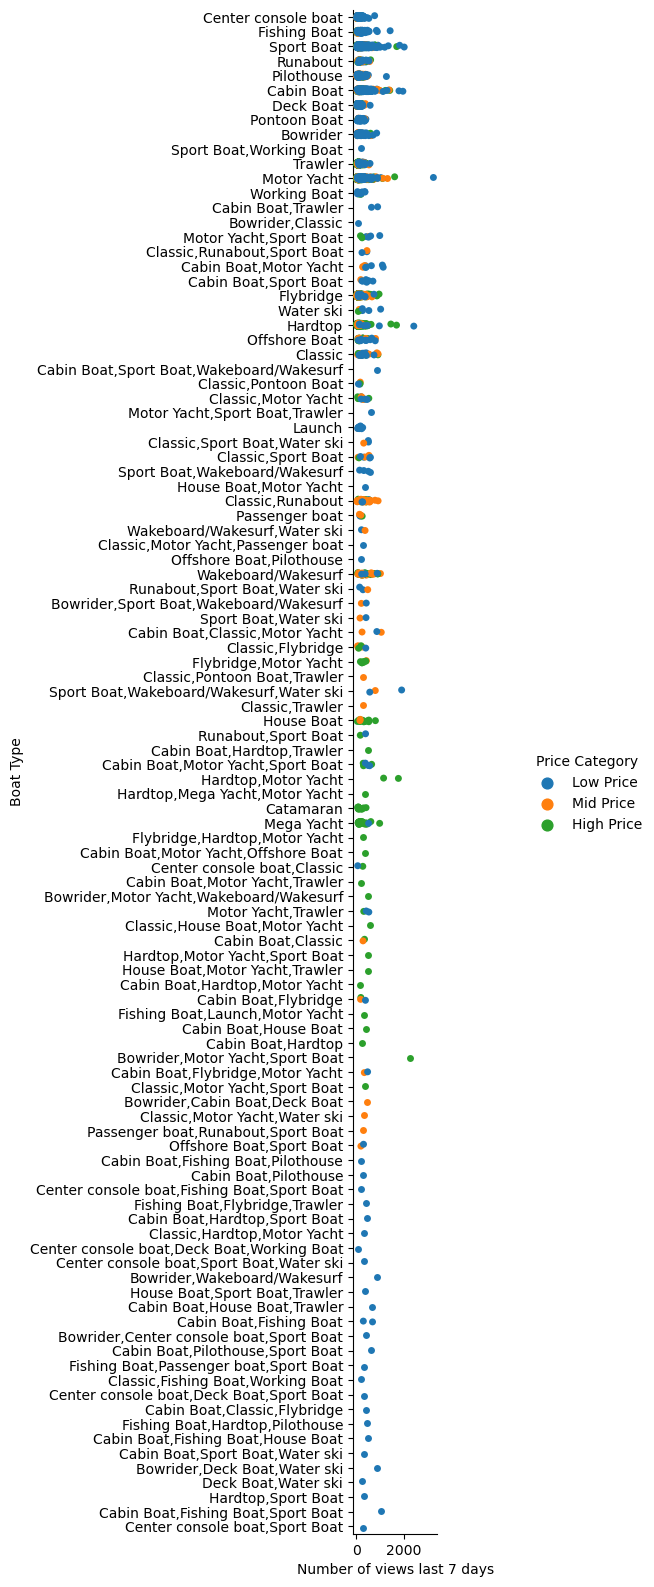

In [53]:
T = sns.catplot(x='Number of views last 7 days', y='Boat Type', hue = 'Price Category', data=df_boat)
T.fig.set_size_inches(10.5,18)

In [48]:
df_boat['Boat Type'].value_counts(dropna=False)

Motor Yacht                        1515
Sport Boat                          907
Flybridge                           761
Pilothouse                          433
Cabin Boat                          397
                                   ... 
Bowrider,Motor Yacht,Sport Boat       1
Bowrider,Classic                      1
Classic,Motor Yacht,Sport Boat        1
Bowrider,Cabin Boat,Deck Boat         1
Center console boat,Sport Boat        1
Name: Boat Type, Length: 104, dtype: int64

In [50]:
df_boat['Country'].value_counts(dropna=False)

Germany                         1209
Italy                            918
Switzerland                      900
France                           870
Spain                            508
Croatia (Hrvatska)               472
Netherlands                      417
United Kingdom                   139
Portugal                         115
Austria                           66
Denmark                           63
Greece                            41
Turkey                            41
Belgium                           40
Malta                             25
Slovenia                          25
Poland                            23
Finland                           22
Sweden                            13
Montenegro                        12
Slovak Republic                    9
Lake Constance                     9
Lake Geneva                        6
Monaco                             6
Cyprus                             5
Hungary                            4
United States                      4
E

# 6. Questions and Answers

## What types of boats have the most views? 
## Motor Yachts, Hardtop boats, Bowrider, and Sport boats have the most views out of all boat types

## What are the prices of the boats with the most views?
## Top three boat prices based off of number of views are 15,049 Euros, 35,350 Euros, and 127,159 Euros

## Do the most viewed boats have any common features?
## Yes the most view boats are made of the same materials Plastic or GRP 

## What are the locations of the most view boats?
## Majority of the boats with the most views are located in Switzerland and Germany

## What are some characteristics of the most viewed boats?
## Most of the boats are listed for under 100,000 Euros and they are mostly older boats.

# 7. Hypothesis

## If a boat is under 100,000 Euros, it will generate more views
## If the boat is older, then it will generate more views
## If the boat is made of Plastic or GRP, then it will generate more views

In [55]:
# Export Data
df_boat.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data2.csv'))